In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
class KleibersLawDataset(Dataset):
    def __init__(self, path):
        data = np.loadtxt(path,delimiter=",")
        self.inputs = torch.log(torch.from_numpy(data[0, :])).to(torch.float32)
        self.outputs = torch.log(torch.from_numpy(data[1, :])).to(torch.float32)

    def __len__(self):
        return (len(self.inputs))

    def __getitem__(self, idx):
        return self.inputs[idx], self.outputs[idx]

    def scatter_plot(self):
        x = self.inputs.numpy()
        y = self.outputs.numpy()
        plt.scatter(x,y)
        plt.grid()
        plt.show()

In [ ]:
# load the dataset
training_data = KleibersLawDataset("./datasets/kleibers_law_data.csv")

# Show a plot of the raw data
training_data.scatter_plot()

# Create a DataLoader
dataloader = DataLoader(training_data)

In [ ]:
# Define a linear model with torch.nn.Module
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
# instatiate the model based on the size of the input data
model = LinearModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

In [ ]:
# Train the model
logx = dataloader.dataset.inputs
logy = dataloader.dataset.outputs
num_epochs = 200
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(logx.view(-1,1))
    loss = criterion(outputs, logy.view(-1,1))
    loss.backward()
    optimizer.step()

In [ ]:
# Get the weight and bias(slope and y-intercept) of the trained model
m, b = model.linear.weight.item(), model.linear.bias.item()

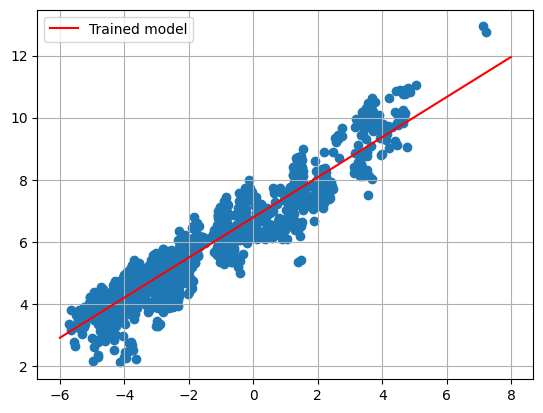

In [89]:
# Plot the trained model along with the raw data
xfit = np.arange(-6,8,0.01)
yfit = m*xfit + b

fig, ax = plt.subplots()
ax.scatter(logx, logy)
ax.plot(xfit, yfit, "-r", label="Trained model")
ax.grid()
ax.set()
ax.legend()
plt.show()